# Table of Contents

* [Data Sources](#Data-Sources)
* [Gather the Data](#Gather-the-Data)
* [Explore the Data](#Explore-the-Data)
    * [Merge the titleBasics and titleRatings Data](#Merge-the-titleBasics-and-titleRatings-Data)
    * [Explore titleType From titleBasics](#Explore-titleType-From-titleBasics)
    * [Explore Rows with Null Data](#Explore-Rows-with-Null-Data)
    * [Determine What Timeframe to Include](#Determine-What-Timeframe-to-Include)
    * [Determine What Genres to Include](#Determine-What-Genres-to-Include)
    * [Save Dataframes for Other Notebooks](#Save-Dataframes-for-Other-Notebooks)
    * [Determine the Target Average Rating](#Determine-the-Target-Average-Rating)
* [Model the Data](#Model-the-Data)
    * [Building a Decision Tree](#Building-a-Decision-Tree)
    * [Building a Random Forest Model](#Building-a-Random-Forest-Model)
* [Visualize the Results](#Visualize-the-Results)


<hr>

## Data Sources

Description of the IMDB data: https://www.imdb.com/interfaces/

IMDB Data Sources: https://datasets.imdbws.com/

<hr>

## Gather the Data

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp
from scipy import stats
from scipy.stats import norm

In [3]:
sns.set(rc={'figure.figsize': (12, 10), "lines.markeredgewidth": 0.5 })

In [4]:
# display imdb documentation in the notebook
from IPython.display import IFrame
IFrame("../IMDB Dataset Descriptions.pdf", 800, 600)

In [5]:
# display imdb ER Diagram in the notebook
from IPython.display import IFrame
IFrame("../../Presentation/IMDB ERD.pdf", 800, 600)

In [6]:
#===============================================================================
#     READ INPUT DATA
#===============================================================================

#--------------------------------------------------------
#--  Input File 1:  name.basics.tsv
#--------------------------------------------------------
#print('Reading name.basics.tsv')
#nameBasics = pd.read_csv("../Data/name.basics.tsv/data.tsv", sep='\t')
#print('Complete - 1 of 7')
#print(nameBasics.head(5))

#--------------------------------------------------------
#--  Input File 2:  title.akas.tsv
#--------------------------------------------------------
#print('Reading title.akas.tsv')
#titleAkas = pd.read_csv("../Data/title.akas.tsv/data.tsv", sep='\t',dtype={"titleId": object, "ordering": object, "title": object, "region": object, "language": object, "types": object, "attributes": object, "isOriginalTitle": object})
#print('Complete - 2 of 7')
#print(titleAkas.head(5))

#--------------------------------------------------------
#--  Input File 3:  title.basics.tsv
#--------------------------------------------------------
print('Reading title.basics.tsv')
titleBasics = pd.read_csv("../Data/title.basics.tsv/data.tsv", sep='\t',dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object})
#print('Complete - 3 of 7')
titleBasics = titleBasics[titleBasics.isAdult == "0"]
print(titleBasics.head(5))

#--------------------------------------------------------
#--  Input File 4:  title.crew.tsv
#--------------------------------------------------------
#print('Reading title.crew.tsv')
#titleCrew = pd.read_csv("../Data/title.crew.tsv/data.tsv", sep='\t')
#print('Complete - 4 of 7')
#print(titleCrew.head(5))

#--------------------------------------------------------
#--  Input File 5:  title.episode.tsv
#--------------------------------------------------------
#print('Reading title.episode.tsv')
#titleEpisode = pd.read_csv("../Data/title.episode.tsv/data.tsv", sep='\t')
#print('Complete - 5 of 7')
#print(titleEpisode.head(5))

#--------------------------------------------------------
#--  Input File 6:  title.principals.tsv
#--------------------------------------------------------
#print('Reading title.principals.tsv')
#titlePrincipals = pd.read_csv("../Data/title.principals.tsv/data.tsv", sep='\t')
#print('Complete - 6 of 7')
#print(titlePrincipals.head(5))

#--------------------------------------------------------
#--  Input File 7:  title.ratings.tsv
#--------------------------------------------------------
print('Reading title.ratings.tsv')
titleRatings = pd.read_csv("../Data/title.ratings.tsv/data.tsv", sep='\t',dtype={"tconst": object, "averageRating": float, "numVotes": int})
print('CompletitleRatingste - 7 of 7')
print(titleRatings.head(5))

print('\n-----all data loaded -----')

Reading title.basics.tsv
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             \N           Animation,Short  
4       0      1893      \N              1                     Short  
Reading title.ratings.tsv
CompletitleRatingste - 7 of 7
      tconst  averageRating  numVotes
0  tt00000

<hr>

## Explore the Data

In [7]:
titleBasics.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,4995016,4995016,4995010,4995010,4995016,4995016,4995016,4995016,4995016
unique,4995016,10,2592549,2606278,1,146,94,776,2080
top,tt4975288,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,\N
freq,1,3413257,28808,28814,4995016,292947,4954210,3465520,406668


In [8]:
titleRatings.describe()

,averageRating,numVotes
count,852306.000000,8.523060e+05
mean,6.929305,9.783524e+02
std,1.395433,1.537121e+04
min,1.000000,5.000000e+00
25%,6.200000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.700000e+01
max,10.000000,1.974184e+06


In [9]:
len(titleBasics) - len(titleRatings)

4142710

The titleBasics table has 4153738 more rows than the titleRatings table. 

Will need to look at removing NaN were appropriate and get a subset of data that contains only movies.

<hr>

### Merge the titleBasics and titleRatings Data

No need to rename columns as the column names are already consistent and have a way to join naturally using the `tconst` column.

Use of the pandas database-style [`merge()`](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) function.

In [10]:
# returns an inner join of both dataframes
title_data = pd.merge(titleBasics, titleRatings, how='inner', on=['tconst'])

# Check the length of the resulting join
len(title_data)

835236

In [11]:
title_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1391
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,163
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,979
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,98
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1673


<hr>

### Explore titleType From titleBasics

In [12]:
title_data.titleType.value_counts()

tvEpisode       356931
movie           217354
short           102739
tvSeries         58110
tvMovie          42220
video            32514
videoGame         8551
tvMiniSeries      8045
tvSpecial         6353
tvShort           2419
Name: titleType, dtype: int64

TitleTypes to include:
- movie

TitleTypes to consider (similar to movies, these have one runtime with no endYear value):
- short, tvMovie, video, tvSpecial, tvShort

Apply a mask that removes all title types that are not `movies`, then save the results to a new dataframe. Next remove unused columns that contain all NaN or null values.

In [13]:
# remove all titleTypes except for movies
movie_data = title_data[title_data.titleType == 'movie']

# drop unused columns
movie_data = movie_data.drop(['titleType', 'isAdult', 'endYear'], axis=1)

movie_data.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.5,67
142,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20,"Documentary,News,Sport",5.2,259
235,tt0000335,Soldiers of the Cross,Soldiers of the Cross,1900,\N,"Biography,Drama",6.2,35
337,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.3,463
353,tt0000615,Robbery Under Arms,Robbery Under Arms,1907,\N,Drama,5.1,13


<hr>

### Explore Rows with Null Data

Next will explore rows with null data and will need to decide if they should be included in the final dataset. As well as explore the datatypes of rows with numerical data.

To convert the `startYear` type from an Object to an Int datatype, we need to fill all NaN rows with zero. This allows for the columns to be used in calculations and charts.

**Decision:** Since there are less than 5 rows that do not have a start year, we will remove all '0' values from this column.

In [14]:
# replace values with '\N' with the pandas 'NaN'
# source: https://stackoverflow.com/a/49406417
movie_data = movie_data.replace({'\\N': np.nan})

# fill NaN rows with 0
movie_data['startYear'] = movie_data.startYear.fillna(0)

# convert the column to datatype of int
movie_data['startYear'] = movie_data.startYear.astype(int)

# drop the rows that contain a startYear of 0
# source: https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
movie_data = movie_data[movie_data.startYear != 0]

In [15]:
# check what rows are missing data
movie_data.isnull().sum()

tconst                0
primaryTitle          0
originalTitle         1
startYear             0
runtimeMinutes    27288
genres            13553
averageRating         0
numVotes              0
dtype: int64

The `runtimMinutes` is currently the only column that is an object but may consider turning to a type of int.

**Decision Needed:** Convert the 27,335 NaN values to 0?

**Decision Needed:** Should the NaN/0 values remain in the final cleaned dataset?

In [16]:
# fill NaN rows with 0
movie_data['runtimeMinutes'] = movie_data.runtimeMinutes.fillna(0)

# convert the column to datatype of int
movie_data['runtimeMinutes'] = movie_data.runtimeMinutes.astype(int)

In [17]:
# check what rows are missing data
movie_data.isnull().sum()

tconst                0
primaryTitle          0
originalTitle         1
startYear             0
runtimeMinutes        0
genres            13553
averageRating         0
numVotes              0
dtype: int64

<hr>

### Determine What Timeframe to Include

Why limit the timeframe? Movies release before a certain period of time are not being reviewed as they are release, where many of the reviews may come from viewers watching the movie(s) years after the initial release. For example, the data from IMDB would not have reviews from the year 1894, the same year the movie was released. 

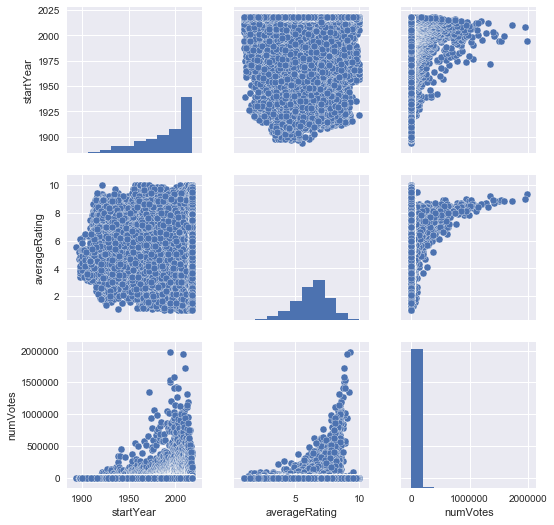

In [18]:
sns.pairplot(data=movie_data[['startYear', 'averageRating', 'numVotes']])

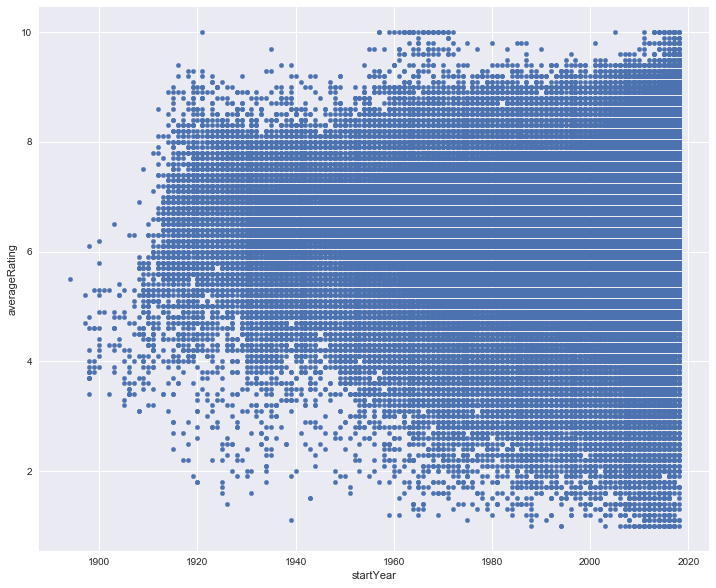

In [19]:
movie_data.plot.scatter(x="startYear", y="averageRating")

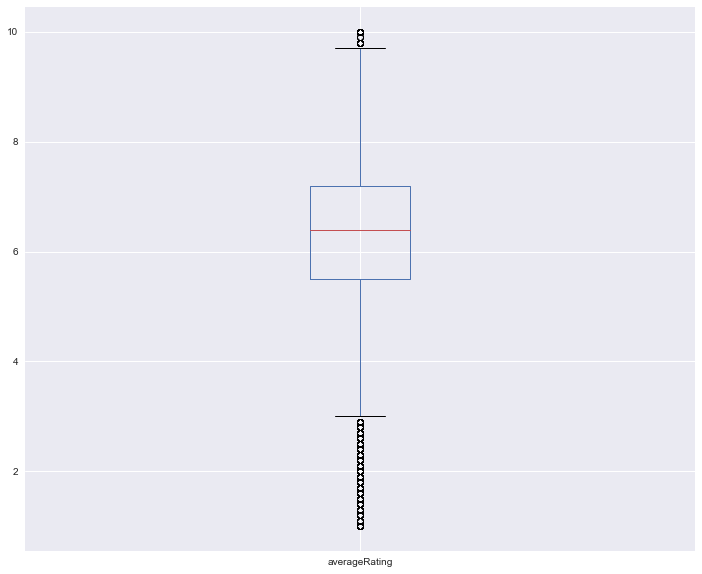

In [20]:
movie_data.averageRating.plot(kind='box')

Calculate the thresholds for the outliers.

In [21]:
q1 = movie_data.averageRating.quantile(0.25)  # first quartile
q3 = movie_data.averageRating.quantile(0.75)  # third quartile
IQR = q3 - q1  # IQR
lower_threshold = q1 - 1.5 * IQR  # lower threshold
upper_threshold = q3 + 1.5 * IQR  # upper threshold
display(lower_threshold, upper_threshold)

2.9499999999999997

9.75

Pivot table that looks at the average movie rating for each year.

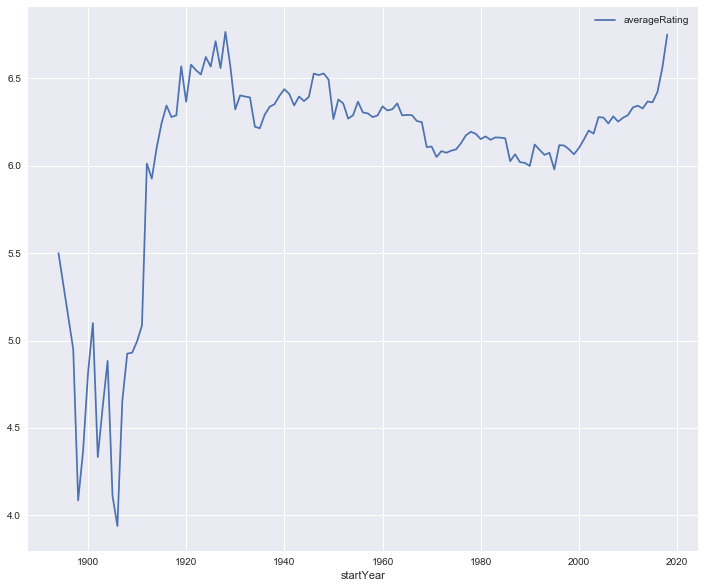

In [22]:
movie_pivot = movie_data.pivot_table(index="startYear", 
                       values=["averageRating"])

movie_pivot.plot(kind='line')

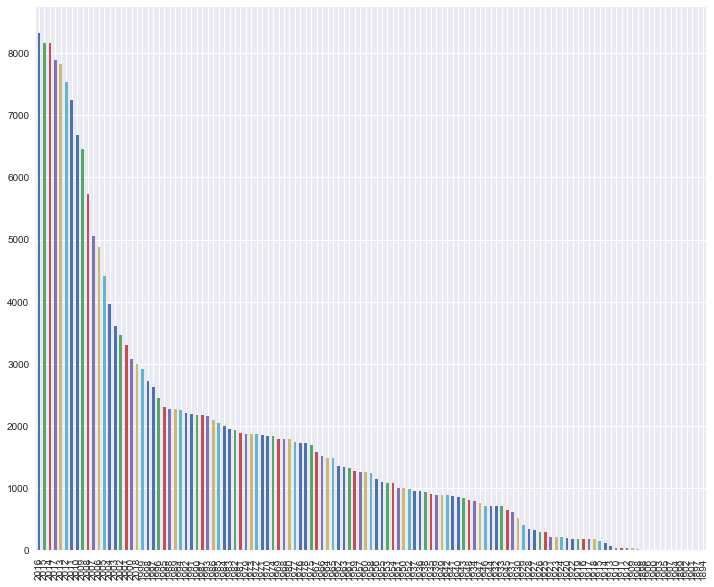

In [23]:
# plot the number of movie reviews per year
movie_pivot = movie_data['startYear'].value_counts()

movie_pivot.plot(kind='bar')

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123]),
 <a list of 123 Text xticklabel objects>)

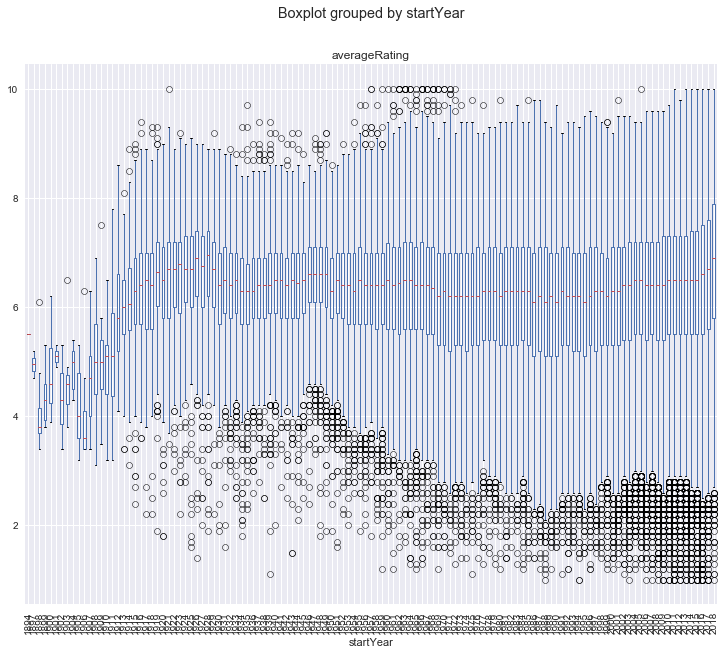

In [24]:
movie_data.boxplot(column='averageRating', by='startYear')
plt.xticks(rotation=90)

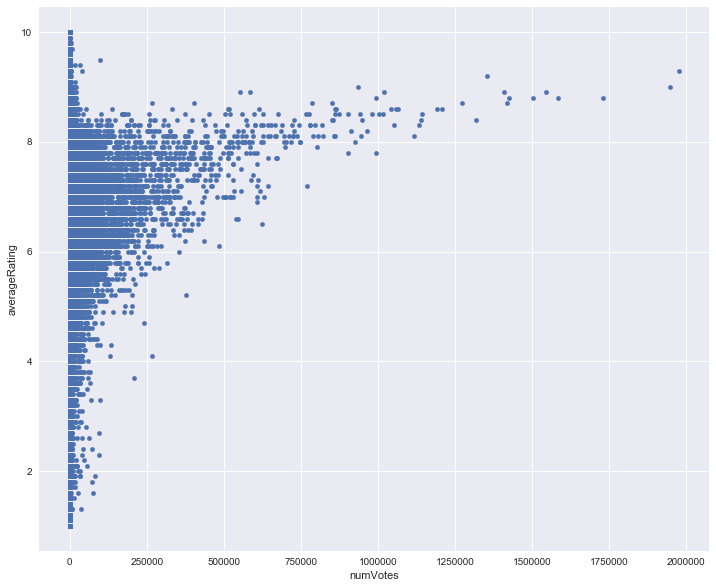

In [25]:
movie_data.plot.scatter(x="numVotes", y="averageRating")

C:\Users\sparkc5\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


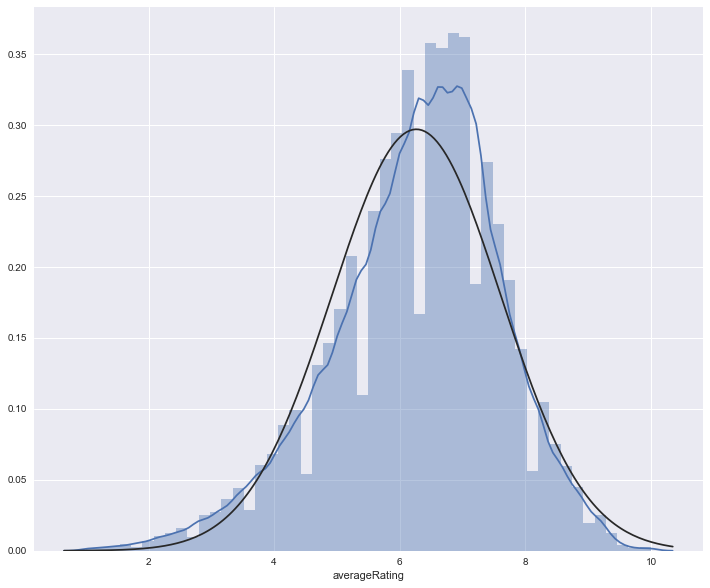

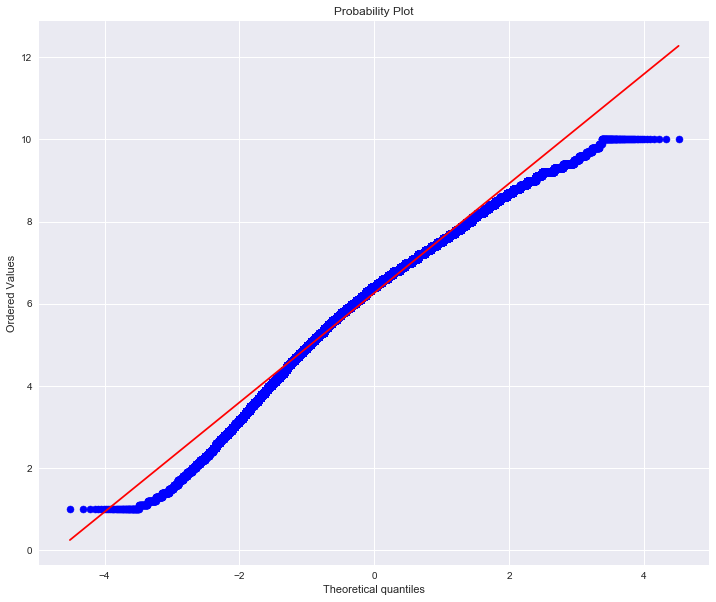

In [26]:
# test the normality of averageRating (should look like a normal distribution)
# histogram & normal probability plot
sns.distplot(movie_data['averageRating'], fit=norm)
fig = plt.figure()
res = stats.probplot(movie_data['averageRating'], plot=plt)

In [27]:
ratings = movie_data['averageRating']
ratings_mean = ratings.mean()
ratings_median = ratings.median()

# compute descriptive summary stats of the movie ratings
ratings_summary = ratings.describe()

ratings_mode = sp.stats.mode(ratings)
skew = ratings.skew()
kurt = ratings.kurt()

# compute quantiles
ninety = ratings.quantile(0.9)
eighty = ratings.quantile(0.8)
seventy = ratings.quantile(0.7)
sixty = ratings.quantile(0.6)

print('Skew: ', str(skew))
print('Kurtosis: ', str(kurt))
print('90%: ', str(ninety))
print('80%: ', str(eighty))
print('70%: ', str(seventy))
print('60%: ', str(sixty))
print(ratings_summary)

Skew:  -0.512744130668522
Kurtosis:  0.3977808846222439
90%:  7.8
80%:  7.3
70%:  7.0
60%:  6.7
count    217352.000000
mean          6.263369
std           1.343145
min           1.000000
25%           5.500000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64


count    217352.000000
mean          6.263369
std           1.343145
min           1.000000
25%           5.500000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64


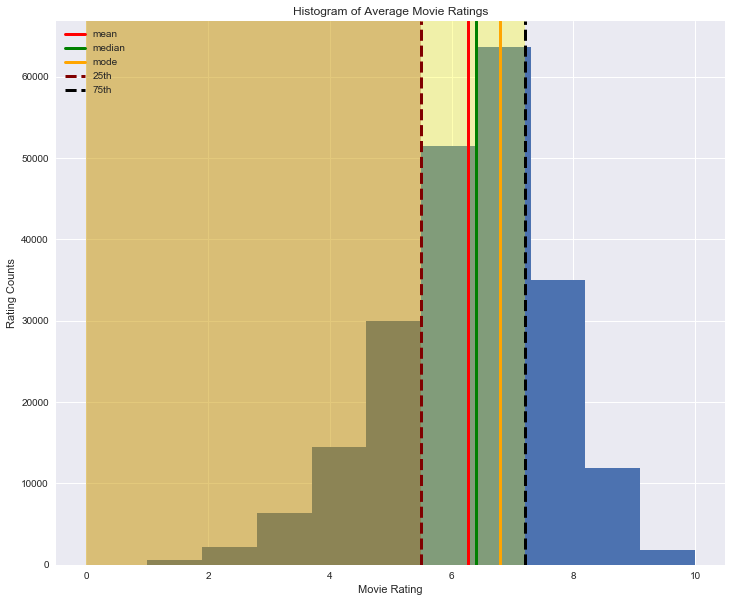

In [28]:
# histogram
h = movie_data['averageRating'].hist(bins=10)

# summary statistics vertical lines
h.axvline(x=ratings_mean, color='red', ls='solid', lw='3', label='mean')
h.axvline(x=ratings_median, color='green', ls='solid', lw='3', label='median')
h.axvline(x=ratings_mode[0][0], color='orange', ls='solid', lw='3', label='mode')

# 25th quantile
h.axvline(x=ratings_summary['25%'], color='maroon', ls='dashed', lw='3', label='25th')
h.axvspan(0, ratings_summary['25%'], facecolor='maroon', alpha=0.3)

# 75th quantile
h.axvline(x=ratings_summary['75%'], color='black', ls='dashed', lw='3', label='75th')
h.axvspan(0, ratings_summary['75%'], facecolor='yellow', alpha=0.3)

# add legend to graph
h.legend(loc=2)

# add a title to the figure
h.set_title('Histogram of Average Movie Ratings')

# set axis labels
h.set_xlabel('Movie Rating')
h.set_ylabel('Rating Counts')

print(ratings_summary)

It appears the general trend is that average movie ratings increases each year sometime after the year 2000. Should explore reasons why. Could be movie saturation?

This dataset also shows at first glance that the more votes a movie receives, the better the average rating. Similar concept to if the movie is bad, you may see primarily negative reviews.

IMDB was established in 1990.

**Decision:** Analyze movies that occur on or after the year 1920.

In [29]:
current_movie_data = movie_data[movie_data.startYear >= 1920]

In [30]:
current_movie_data.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
1166,tt0003854,Dodge City Trail,Dodge City Trail,1936,56,"Adventure,Music,Western",5.6,9
1358,tt0005076,Charley's Aunt,Charley's Aunt,1925,80,Comedy,6.7,37
1959,tt0008933,Die Brüder Karamasoff,Die Brüder Karamasoff,1921,70,Drama,9.0,8
2115,tt0009771,A víg özvegy,A víg özvegy,1920,70,Musical,5.2,12
2166,tt0010058,The Deadlier Sex,The Deadlier Sex,1920,60,"Comedy,Drama",6.9,8


In [31]:
len(current_movie_data)

216015

There's a fractionally larger threshold after narrowing down the startYear.

In [32]:
q1 = current_movie_data.averageRating.quantile(0.25)  # first quartile
q3 = current_movie_data.averageRating.quantile(0.75)  # third quartile
IQR = q3 - q1  # IQR
lower_threshold = q1 - 1.5 * IQR  # lower threshold
upper_threshold = q3 + 1.5 * IQR  # upper threshold
display(lower_threshold, upper_threshold)

2.9499999999999997

9.75

Can infer movie saturation may be the cause for the trend of positive movie ratings.

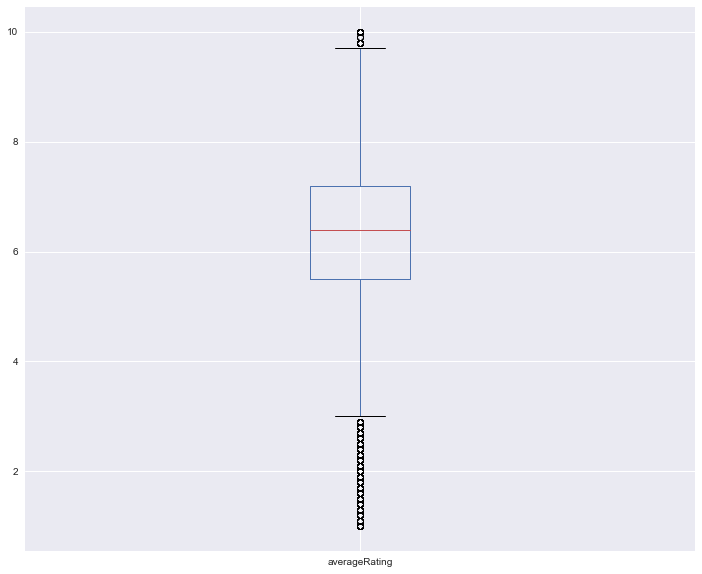

In [33]:
current_movie_data.averageRating.plot(kind='box')

C:\Users\sparkc5\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sparkc5\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


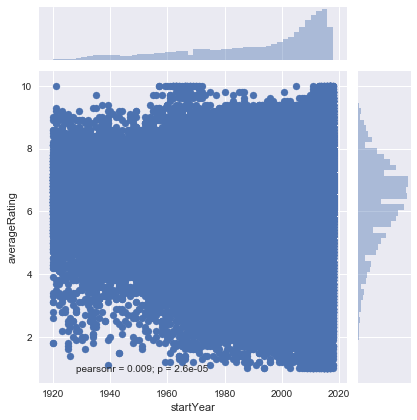

In [34]:
sns.jointplot(x='startYear', y='averageRating',
              data=current_movie_data, kind='scatter');

<hr>

### Determine What Genres to Include

Currently all genres for a movie title are comma separated into one column. Next will one-hot encode, [What is One Hot Encoding? Why And When do you have to use it?](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f), the genre features by separating each genre into it's own column with a boolean value.

In [35]:
# Used for Proof of Concept
#current_movie_data.to_csv("../Data/current_movie_data.csv", sep='\t', index=False)

In [36]:
movies_genres_list = current_movie_data['genres'].tolist()

# convert all values to a string and return the map as a list
# source: https://stackoverflow.com/a/1303354
movies_genres_list = list(map(str, movies_genres_list))

#movies_genres_list

In [37]:
def get_genres(comma_list):
    '''Returns a sorted list of genres from the dataset'''
    genre_dict = dict()  # { key='genre': val='count' }
    genre_list = list()
    
    for index, val in enumerate(comma_list):
        # create a list of lists for each movie entry
        split_list = comma_list[index].split(',')
        
        # store each genre as one entry in the dictionary
        for index, val in enumerate(split_list):
            genre_dict[val] = genre_dict.get(val, 0) + 1
    
    return convert_dict_to_string(genre_dict)


def convert_dict_to_string(dictionary):
    '''Sorts a dictionary into a list of sorted keys'''
    sortedList = list()
    
    # Create a list of keys
    for key, val in dictionary.items():
        sortedList.append(key)
    
    sortedList.sort()
    
    return sortedList


genres_list = get_genres(movies_genres_list)

In [38]:
# create a new subset of data for when we explode the genre columns
movie_data_expanded = current_movie_data.copy()

# convert the NaN values to a string so they are not a float value & throw an error
movie_data_expanded['genres'] = movie_data_expanded.genres.fillna('')

In [39]:
def find_Value(value, subString):
    '''Returns 1 if True, 0 otherwise'''
    if subString in value:
        return 1
    else:
        return 0

def split_genre_columns(list_of_genres):
    '''Explodes the genres column where there is one new column for each genre in the dataset.
       Each new column has a True/False value that corresponds to the genres column.'''
    print('Number of genres:', len(list_of_genres))
    for index, val in enumerate(list_of_genres):
        print(list_of_genres[index])
        movie_data_expanded[list_of_genres[index]] = movie_data_expanded.apply(lambda x: find_Value(x['genres'], list_of_genres[index]), axis=1)
        
        # convert the column to datatype of integer
        movie_data_expanded[list_of_genres[index]] = movie_data_expanded[list_of_genres[index]].astype(int)
        #movie_data_expanded[list_of_genres[index]].str.strip()  # needed if converting to True/False values
        
split_genre_columns(genres_list)  #explode the genre columns
movie_data_expanded.head()

Number of genres: 29
Action
Adult
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
Film-Noir
Game-Show
History
Horror
Music
Musical
Mystery
News
Reality-TV
Romance
Sci-Fi
Short
Sport
Talk-Show
Thriller
War
Western
nan


,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
1166,tt0003854,Dodge City Trail,Dodge City Trail,1936,56,"Adventure,Music,Western",5.6,9,0,0,...,0,0,0,0,0,0,0,0,1,0
1358,tt0005076,Charley's Aunt,Charley's Aunt,1925,80,Comedy,6.7,37,0,0,...,0,0,0,0,0,0,0,0,0,0
1959,tt0008933,Die Brüder Karamasoff,Die Brüder Karamasoff,1921,70,Drama,9.0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2115,tt0009771,A víg özvegy,A víg özvegy,1920,70,Musical,5.2,12,0,0,...,0,0,0,0,0,0,0,0,0,0
2166,tt0010058,The Deadlier Sex,The Deadlier Sex,1920,60,"Comedy,Drama",6.9,8,0,0,...,0,0,0,0,0,0,0,0,0,0


Need to explore why there are certain genres in the dataset such as Adult (filter this out previously), Game-Show, Reality-TV, Short, and Talk-Show.

In [40]:
movie_data_expanded.nan.unique()

array([0], dtype=int64)

**Decision Needed:** Could keep or remove the `nan` column from the resulting genre list. If kept, it would need to be updated to be `True` for everywhere there is a `''` value in the `genres` column.

In [41]:
# source: https://stackoverflow.com/a/19226617
movie_data_expanded.loc[movie_data_expanded.genres == '', 'nan'] = 1

In [42]:
# double check the same number of null values exist as before
movie_data_expanded[movie_data_expanded.genres == ''].genres.value_counts()

    13251
Name: genres, dtype: int64

In [43]:
movie_data_expanded.nan.value_counts()

0    202764
1     13251
Name: nan, dtype: int64

In [44]:
movie_data_expanded[movie_data_expanded.nan == 1].head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
2191,tt0010186,Die Gottesgeisel,Die Gottesgeisel,1920,0,,4.7,14,0,0,...,0,0,0,0,0,0,0,0,0,1
2345,tt0011011,Boccaccio,Boccaccio,1920,0,,5.9,12,0,0,...,0,0,0,0,0,0,0,0,0,1
2348,tt0011024,The Breaking of the Drought,The Breaking of the Drought,1920,87,,5.5,10,0,0,...,0,0,0,0,0,0,0,0,0,1
2375,tt0011137,Good and Evil,Herzogin Satanella,1921,0,,5.5,11,0,0,...,0,0,0,0,0,0,0,0,0,1
2385,tt0011216,Spanish Fiesta,La fête espagnole,1920,0,,7.7,14,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
movie_data_expanded[movie_data_expanded['Talk-Show'] == 1]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Action,Adult,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
23684,tt0045338,The Woman's Angle,The Woman's Angle,1952,86,"Drama,Romance,Talk-Show",5.5,11,0,0,...,0,1,0,0,0,1,0,0,0,0
137929,tt0250811,Vincent Price: The Sinister Image,Vincent Price: The Sinister Image,1987,192,"Biography,Documentary,Talk-Show",8.3,65,0,0,...,0,0,0,0,0,1,0,0,0,0
682405,tt4008976,9.3 Masaru Sato's Talk Show: The Intelligent R...,9.3 Masaru Sato's Talk Show: The Intelligent R...,2014,90,Talk-Show,8.5,537,0,0,...,0,0,0,0,0,1,0,0,0,0
790023,tt6522846,Grillo vs Grillo,Grillo vs Grillo,2017,0,"Comedy,Talk-Show",5.7,78,0,0,...,0,0,0,0,0,1,0,0,0,0
825884,tt7909176,Flower Boy: A Conversation,Flower Boy: A Conversation,2018,58,"Comedy,Documentary,Talk-Show",9.6,7,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Determine Stats For Each Genre

In [46]:
#genres_series = pd.Series(genres_list, name='genres')

genre_avg = pd.DataFrame(columns = ['genre', 'averageRating', 'max', 'min', 'count', 'stdDev', 'numVotes', 'avgRuntimeMinutes'])

In [47]:
def calc_genre_avgs(list_genres):
    '''Populate an empty dataframe with calculated values for all genres in the dataset'''
    for index, val in enumerate(list_genres):
        # mask all data for the current genre
        genreData_temp = movie_data_expanded[movie_data_expanded[list_genres[index]] == 1]
        
        genre_avg.loc[index] = [list_genres[index], genreData_temp.averageRating.mean(), genreData_temp.averageRating.max(), 
                                genreData_temp.averageRating.min(), genreData_temp.averageRating.count(),
                                genreData_temp.averageRating.std(ddof=1), genreData_temp.numVotes.mean(),
                                genreData_temp.runtimeMinutes.mean()]

calc_genre_avgs(genres_list)
genre_avg

,genre,averageRating,max,min,count,stdDev,numVotes,avgRuntimeMinutes
0,Action,5.797580,9.8,1.0,22440,1.341515,9068.355526,87.820722
1,Adult,5.321429,6.7,3.3,14,1.149032,101.642857,73.357143
2,Adventure,6.067538,10.0,1.0,13009,1.300192,14191.610116,87.892228
3,Animation,6.424893,9.4,1.1,3507,1.177903,11118.893356,75.583975
4,Biography,7.069247,10.0,1.1,6266,1.056699,6608.992340,92.115863
5,Comedy,6.026544,9.8,1.0,55162,1.277517,3723.258674,85.082647
6,Crime,6.118861,10.0,1.1,18302,1.172880,7336.791826,89.473391
7,Documentary,7.306157,10.0,1.0,29204,1.097835,279.647959,75.833516
8,Drama,6.382903,10.0,1.0,94332,1.172117,3620.583736,89.659585
9,Family,6.330322,10.0,1.0,8324,1.289085,4271.971288,84.363287


In [48]:
genre_avg.sort_values(by='stdDev', ascending=True)

,genre,averageRating,max,min,count,stdDev,numVotes,avgRuntimeMinutes
11,Film-Noir,6.657520,8.5,3.0,758,0.666892,3233.527704,83.382586
18,News,7.314943,9.4,2.0,609,1.040317,251.660099,77.812808
27,Western,6.031159,9.3,1.2,4063,1.041069,1771.380753,77.917795
4,Biography,7.069247,10.0,1.1,6266,1.056699,6608.992340,92.115863
13,History,6.928426,10.0,1.1,5597,1.093941,4052.385921,95.847240
7,Documentary,7.306157,10.0,1.0,29204,1.097835,279.647959,75.833516
20,Romance,6.230206,9.8,1.0,24012,1.141157,3860.322297,89.361944
1,Adult,5.321429,6.7,3.3,14,1.149032,101.642857,73.357143
26,War,6.559185,10.0,1.1,4856,1.158052,3234.432249,94.935544
8,Drama,6.382903,10.0,1.0,94332,1.172117,3620.583736,89.659585


In [49]:
genre_corr = movie_data_expanded.corr()
genre_corr.sort_values(by='averageRating', ascending=False)

,startYear,runtimeMinutes,averageRating,numVotes,Action,Adult,Adventure,Animation,Biography,Comedy,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
averageRating,0.009041,0.018738,1.000000,0.066420,-0.118387,-0.005652,-0.037163,0.015305,0.103475,-0.103836,...,0.000938,-0.009105,-0.105403,-0.001705,0.032085,0.004494,-0.120604,0.033223,-0.024074,-0.001252
Documentary,0.237554,-0.047307,0.306416,-0.039414,-0.124635,-0.001501,-0.060594,-0.035045,0.181902,-0.205832,...,0.016914,-0.134569,-0.059225,0.005442,0.068198,0.003726,-0.114410,-0.004795,-0.051254,-0.101076
Biography,0.066438,0.030150,0.103475,0.019798,-0.037783,-0.001391,-0.008853,-0.001250,1.000000,-0.074649,...,0.000890,-0.042080,-0.025690,-0.000372,0.042831,0.004902,-0.047077,-0.003509,-0.018448,-0.044185
History,0.019238,0.039441,0.080547,0.004569,-0.019906,-0.001313,0.011261,-0.008501,0.170789,-0.076464,...,0.006789,-0.021985,-0.022900,-0.000351,-0.000843,-0.000785,-0.037968,0.087510,-0.012285,-0.041693
Drama,-0.041193,0.114526,0.077385,0.011795,-0.048774,-0.000132,-0.084821,-0.080021,0.004543,-0.195333,...,-0.005467,0.099955,-0.081454,-0.001894,-0.008687,-0.002296,-0.044251,0.065510,-0.083772,-0.225083
numVotes,0.043388,0.065292,0.066420,1.000000,0.067342,-0.000851,0.093966,0.034325,0.019798,0.009880,...,-0.001109,0.007607,0.073528,-0.000233,0.006718,-0.000502,0.037631,0.000049,-0.006811,-0.027720
Music,-0.093757,0.023189,0.050469,-0.009857,-0.046491,-0.001794,-0.032757,-0.012577,0.044777,0.054445,...,-0.002299,0.047674,-0.028775,-0.000479,-0.015465,-0.001072,-0.060900,-0.023493,0.005106,-0.056963
News,0.046114,-0.004461,0.041555,-0.005351,-0.016959,-0.000428,-0.006854,-0.005449,0.015261,-0.028535,...,0.007913,-0.018526,-0.008502,-0.000114,-0.003961,-0.000256,-0.014415,-0.003351,-0.007362,-0.013593
War,-0.083157,0.034176,0.033223,0.000049,-0.001991,-0.001221,-0.005571,-0.016269,-0.003509,-0.063525,...,-0.001565,-0.001171,-0.018839,-0.000326,-0.014264,-0.000730,-0.027993,1.000000,-0.011571,-0.038767
Sport,0.025093,0.009185,0.032085,0.006718,-0.008217,-0.000852,-0.013787,-0.008001,0.042831,-0.010986,...,-0.001092,-0.008738,-0.014941,-0.000228,1.000000,-0.000509,-0.028167,-0.014264,-0.012704,-0.027063


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245579CE9B0>,
      dtype=object)

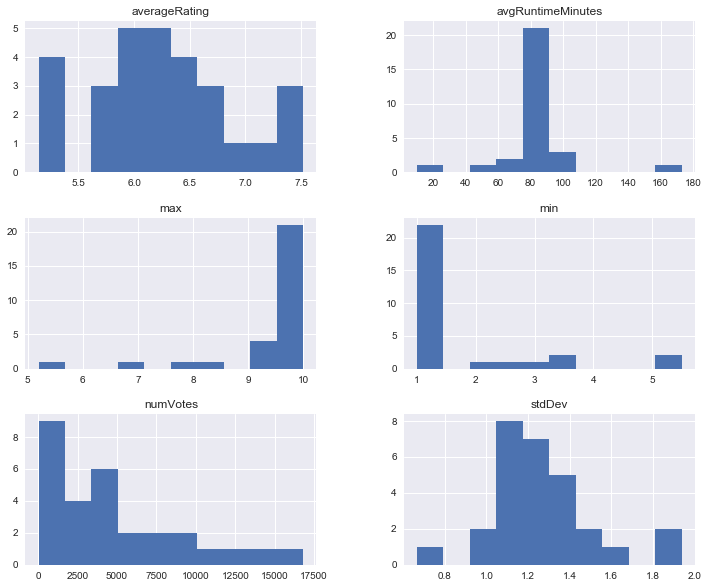

In [51]:
genre_avg.hist()

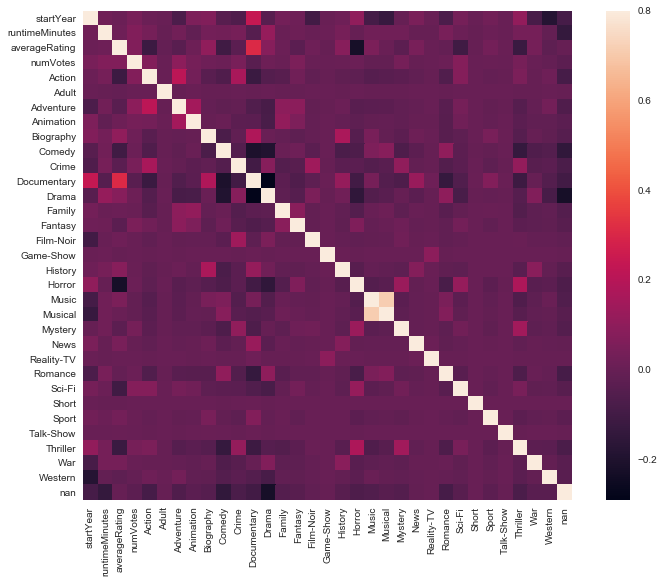

In [52]:
# correlation matrix
corrmatrix = movie_data_expanded.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=0.8, square=True)

In [53]:
#columns = [genres_series, 'averageRating', 'numVotes', 'runtimeMinutes']

#genre_avg = pd.DataFrame

#movie_data_expanded[movie_data_expanded.Action == 'True'].head()

May also want to look into how well movies performed by region. Would need to use the title.akas.tsv file to analyze this.

### Save Dataframes for Other Notebooks

Save cleaned data to a csv for later analysis in another notebook.

In [54]:
#genre_avg.to_csv("../Data/genre_avg_data.csv", sep='\t', index=False)
movie_data_expanded.to_csv("../Data/movie_data_expanded.csv", sep='\t', index=False)

In [55]:
# save a skinny table for the "Crew Analysis" workbook
columns = ['tconst', 'startYear']

movie_data_years = pd.DataFrame(movie_data_expanded[columns]).copy(deep=True)

movie_data_years.to_csv("../Data/movie_data_years.csv", sep='\t', index=False)

<hr>

### Determine the Target Average Rating

Pandas [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) method and [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) guide for reference.

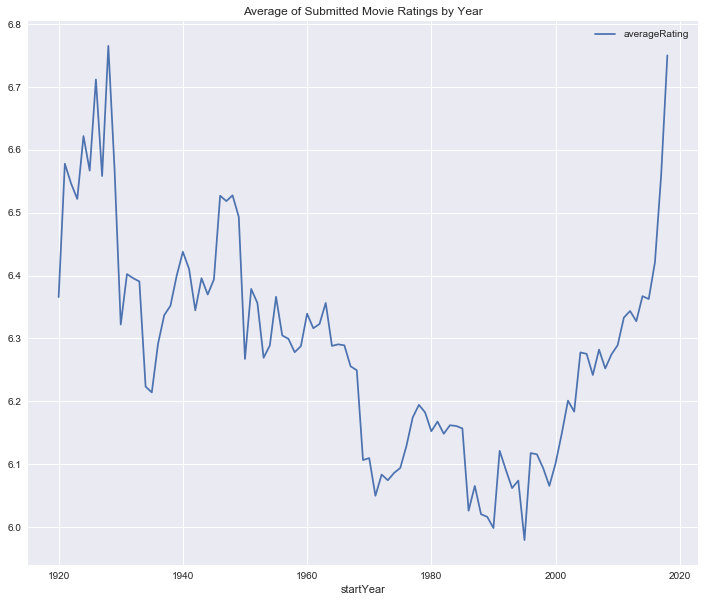

In [56]:
# plot the average movie rating by year
movie_pivot = current_movie_data.pivot_table(index="startYear", 
                       values=["averageRating"])

movie_pivot.plot(kind='line', title='Average of Submitted Movie Ratings by Year')

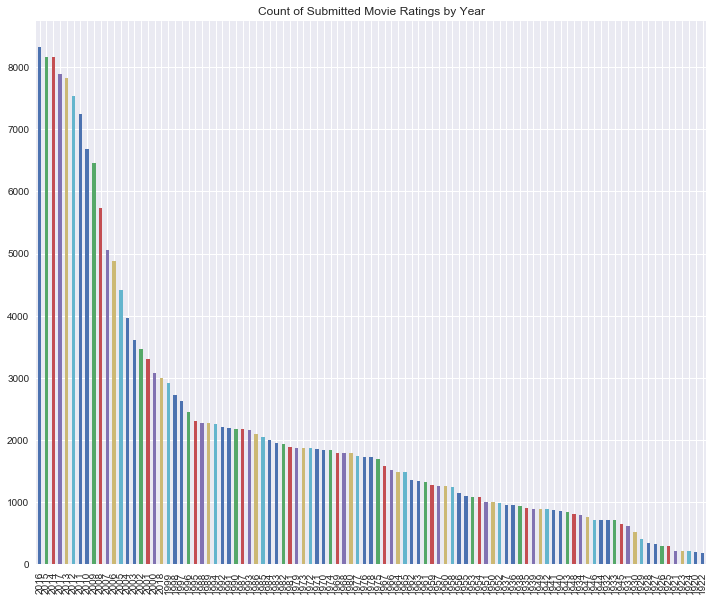

In [57]:
# plot the number of movie reviews per year
movie_pivot = current_movie_data['startYear'].value_counts()

movie_pivot.plot(kind='bar', title='Count of Submitted Movie Ratings by Year')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 99 Text xticklabel objects>)

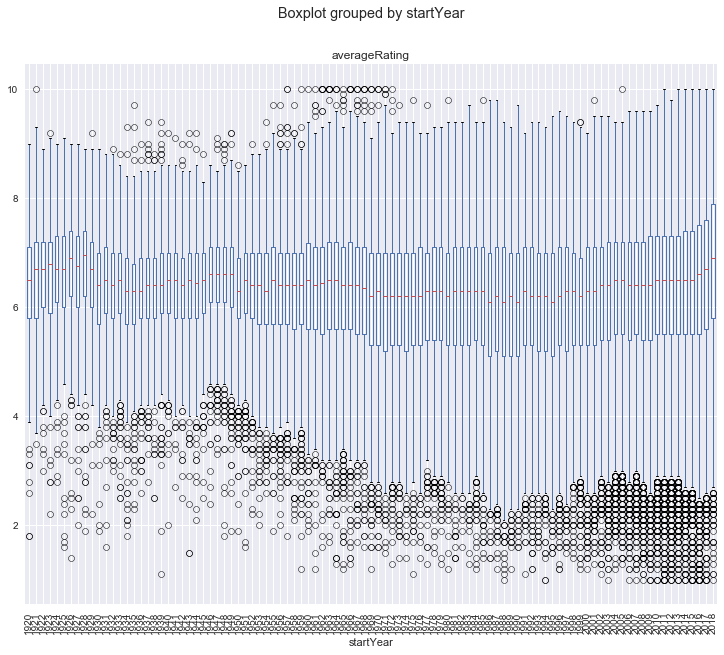

In [58]:
current_movie_data.boxplot(column='averageRating', by='startYear')
plt.xticks(rotation=90)

Plot the Density or kernel density estimation (KDE) of the average ratings by year to estimate the probability density function (PDF) using the [`.plot.kde()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.kde.html) DataFrame method.

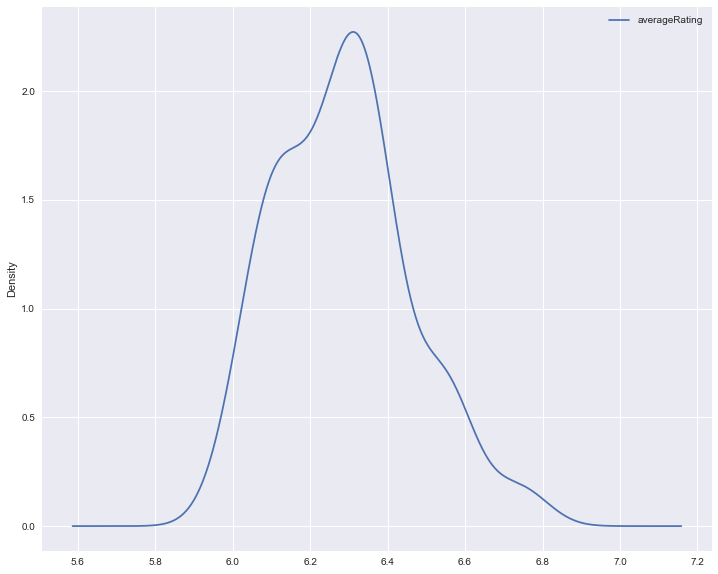

In [59]:
# create a Series of the average movie rating by year
movie_pivot = current_movie_data.pivot_table(index="startYear", values=["averageRating"])

# plot the Density or (KDE)
movie_pivot.plot.kde()

C:\Users\sparkc5\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


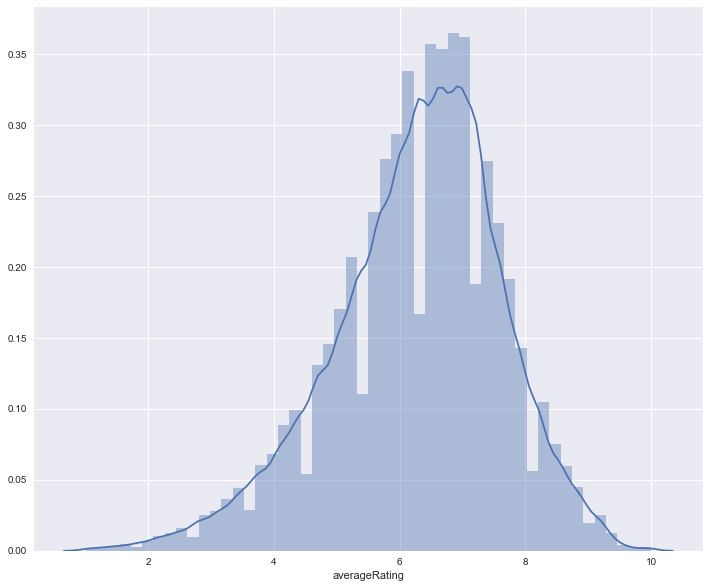

In [60]:
sns.distplot(current_movie_data['averageRating'])

References from the Kaggle Notebook [Comprehensive Data Exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

C:\Users\sparkc5\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


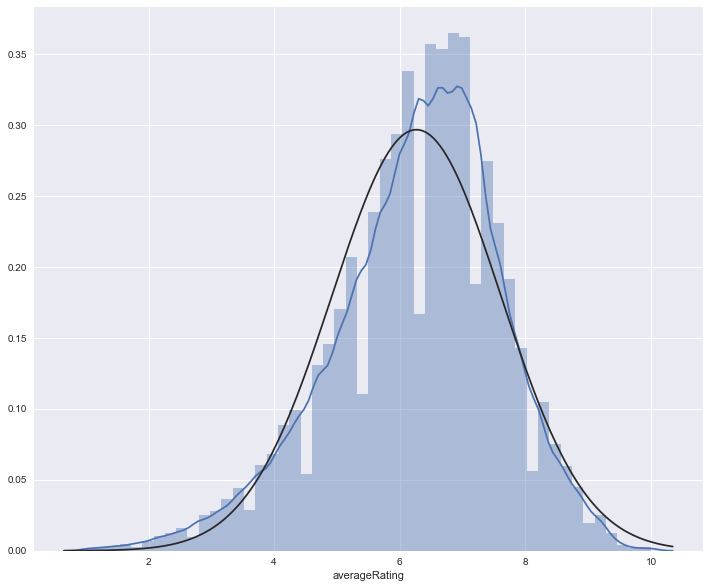

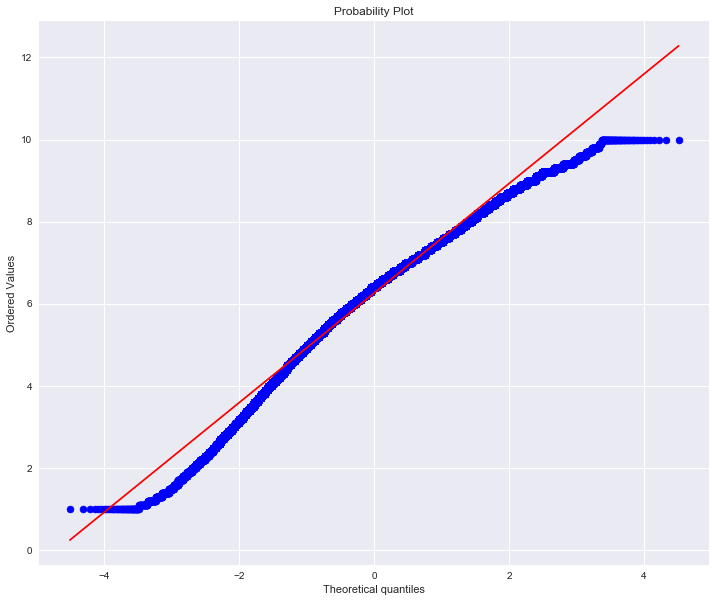

In [61]:
# test the normality of averageRating (should look like a normal distribution)
# histogram & normal probability plot
sns.distplot(current_movie_data['averageRating'], fit=norm)
fig = plt.figure()
res = stats.probplot(current_movie_data['averageRating'], plot=plt)

C:\Users\sparkc5\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


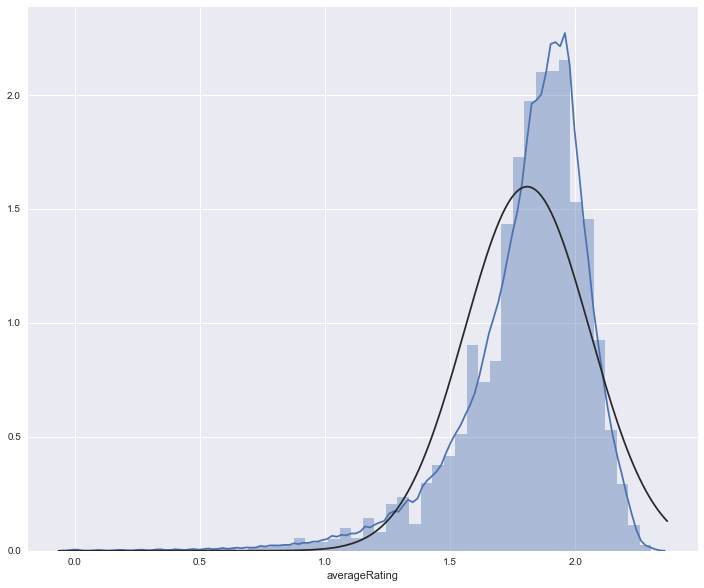

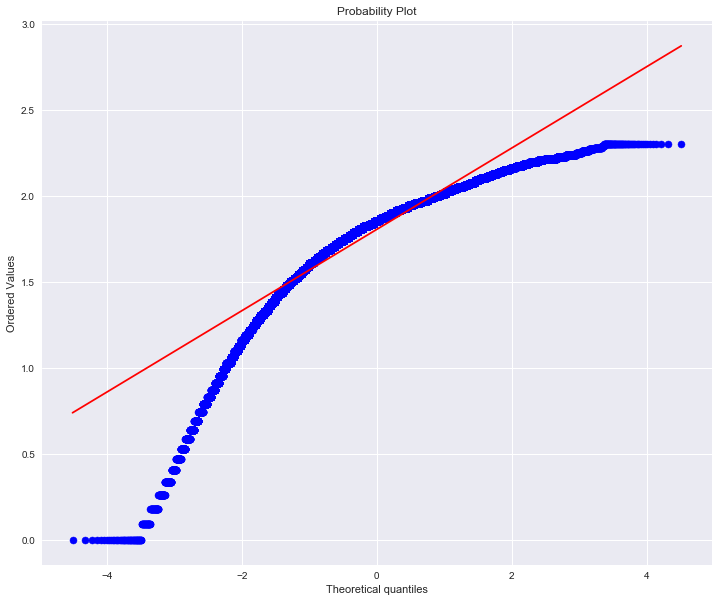

In [62]:
linear_movie_data = current_movie_data.copy()

linear_movie_data['averageRating'] = np.log(linear_movie_data['averageRating'])

# test the normality of averageRating (should look like a normal distribution)
# histogram & normal probability plot
sns.distplot(linear_movie_data['averageRating'], fit=norm)
fig = plt.figure()
res = stats.probplot(linear_movie_data['averageRating'], plot=plt)

The averageRating is a normal linear distribution. 

In [63]:
q1 = movie_pivot.averageRating.quantile(0.25)  # first quartile
q3 = movie_pivot.averageRating.quantile(0.75)  # third quartile
IQR = q3 - q1  # IQR
lower_threshold = q1 - 1.5 * IQR  # lower threshold
upper_threshold = q3 + 1.5 * IQR  # upper threshold
display(lower_threshold, upper_threshold)

5.814657345413752

6.710013463510324

Next will look at the stats for the `averageRating` and plot a histogram of the quantiles to determine if we can define/prove what a high rating movie is. The below uses the "[Happy Healthy Hungry -- San Francisco](http://nbviewer.jupyter.org/github/Jay-Oh-eN/happy-healthy-hungry/blob/master/h3.ipynb)" notebook analysis as reference.

In [64]:
ratings = current_movie_data['averageRating']
ratings_mean = ratings.mean()
ratings_median = ratings.median()

# compute descriptive summary stats of the movie ratings
ratings_summary = ratings.describe()

ratings_mode = sp.stats.mode(ratings)
skew = ratings.skew()
kurt = ratings.kurt()

# compute quantiles
ninety = ratings.quantile(0.9)
eighty = ratings.quantile(0.8)
seventy = ratings.quantile(0.7)
sixty = ratings.quantile(0.6)

print('Skew: ', str(skew))
print('Kurtosis: ', str(kurt))
print('90%: ', str(ninety))
print('80%: ', str(eighty))
print('70%: ', str(seventy))
print('60%: ', str(sixty))
print(ratings_summary)

Skew:  -0.5149214491323041
Kurtosis:  0.4010134416583222
90%:  7.799999999999999
80%:  7.299999999999999
70%:  7.0
60%:  6.700000000000001
count    216015.000000
mean          6.264803
std           1.343718
min           1.000000
25%           5.500000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64


count    216015.000000
mean          6.264803
std           1.343718
min           1.000000
25%           5.500000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64


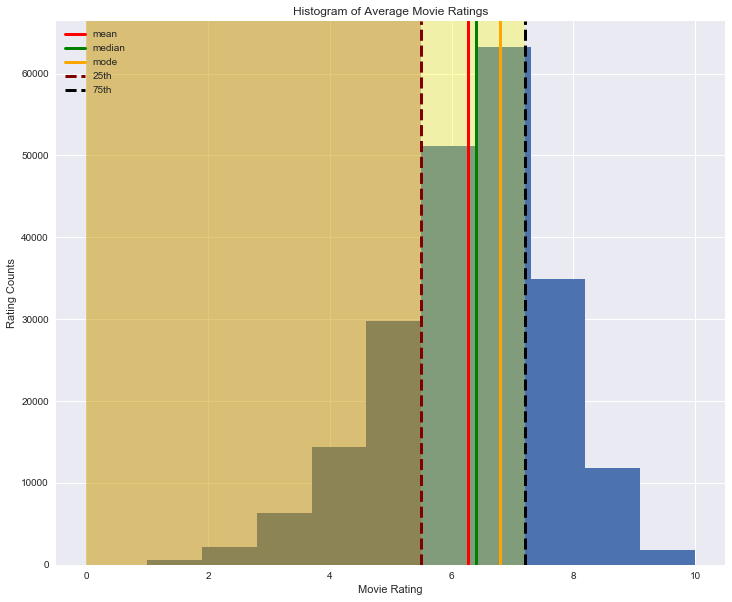

In [65]:
# histogram
h = current_movie_data['averageRating'].hist(bins=10)

# summary statistics vertical lines
h.axvline(x=ratings_mean, color='red', ls='solid', lw='3', label='mean')
h.axvline(x=ratings_median, color='green', ls='solid', lw='3', label='median')
h.axvline(x=ratings_mode[0][0], color='orange', ls='solid', lw='3', label='mode')

# 25th quantile
h.axvline(x=ratings_summary['25%'], color='maroon', ls='dashed', lw='3', label='25th')
h.axvspan(0, ratings_summary['25%'], facecolor='maroon', alpha=0.3)

# 75th quantile
h.axvline(x=ratings_summary['75%'], color='black', ls='dashed', lw='3', label='75th')
h.axvspan(0, ratings_summary['75%'], facecolor='yellow', alpha=0.3)

# add legend to graph
h.legend(loc=2)

# add a title to the figure
h.set_title('Histogram of Average Movie Ratings')

# set axis labels
h.set_xlabel('Movie Rating')
h.set_ylabel('Rating Counts')

print(ratings_summary)

**Defining High Rated movie with a rating of 8.** Why? The 90% quantile is a rating of 8.

First, we will create a new column in our dataframe that identifies all high rated movies, as defined above.

In [66]:
# create new column for new variable
movie_data_expanded['highRating'] = pd.Series(len(movie_data_expanded['averageRating']), index=movie_data_expanded.index)

# default new column to 0
movie_data_expanded['highRating'] = 0

# 1 if avg rating 8 or more; 0 if avg rating < 8
movie_data_expanded.loc[movie_data_expanded['averageRating'] >= 8, 'highRating'] = 1

In [67]:
movie_data_expanded.highRating.value_counts()

0    197268
1     18747
Name: highRating, dtype: int64

<hr>

## Model the Data

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Create Train & Test Datasets

Create a test and train dataset. Movies in the year 2018 will be the test dataset, while movies from 1980-2017 will be the training dataset.

In [69]:
movie_data_simplified = movie_data_expanded.drop(['primaryTitle', 'originalTitle', 'genres', 'highRating'], axis=1)

movie_data_simplified.head()

,tconst,startYear,runtimeMinutes,averageRating,numVotes,Action,Adult,Adventure,Animation,Biography,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
1166,tt0003854,1936,56,5.6,9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1358,tt0005076,1925,80,6.7,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1959,tt0008933,1921,70,9.0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2115,tt0009771,1920,70,5.2,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2166,tt0010058,1920,60,6.9,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
train_movie_data = movie_data_simplified.loc[movie_data_expanded['startYear'] < 2018]
# drop the target column from the training data
train_movie_data = train_movie_data.drop(['averageRating'], axis=1)

test_movie_data = movie_data_simplified.loc[movie_data_expanded['startYear'] >= 2018]

In [71]:
# save the datasets to csv files
#train_movie_data.to_csv("../Data/train_movie_data.csv", sep='\t', index=False)
#test_movie_data.to_csv("../Data/test_movie_data.csv", sep='\t', index=False)

<hr>

The goal is to predict high rated movies to know what movie should be produced.

First, set the prediction target, `averageRating`, as `y`.

In [72]:
y = movie_data_simplified.averageRating

Set the predictors as `X`.

In [73]:
# not including the 'nan' genre column
movie_predictors = ['startYear', 'runtimeMinutes', 'numVotes', 'Action', 'Adult', 'Adventure', 'Animation', 
                    'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
                    'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
                    'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']

'''movie_predictors = ['runtimeMinutes', 'numVotes']'''

X = movie_data_simplified[movie_predictors]

Split the data into training and validation data.

In [74]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=0.20)

### Building a Decision Tree

The first model will be a decision tree using the sklearn [`DecisionTreeRegressor()`](scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) method.

In [75]:
# define the model
movie_model = DecisionTreeRegressor()

# fit the model
movie_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [76]:
print('Making predictions for the following 5 movies:')
print(X.head())
print('The predictions are:')
print(movie_model.predict(X.head()))
print('The actual ratings are:')
print(movie_data_expanded.averageRating.head().tolist())

Making predictions for the following 5 movies:
      startYear  runtimeMinutes  numVotes  Action  Adult  Adventure  \
1166       1936              56         9       0      0          1   
1358       1925              80        37       0      0          0   
1959       1921              70         8       0      0          0   
2115       1920              70        12       0      0          0   
2166       1920              60         8       0      0          0   

      Animation  Biography  Comedy  Crime   ...     News  Reality-TV  Romance  \
1166          0          0       0      0   ...        0           0        0   
1358          0          0       1      0   ...        0           0        0   
1959          0          0       0      0   ...        0           0        0   
2115          0          0       0      0   ...        0           0        0   
2166          0          0       1      0   ...        0           0        0   

      Sci-Fi  Short  Sport  Talk-Show  

The Mean Absolute Error (MAE) tells us how far our predictions are off, on average. The prediction error for each movie is: 

`error = actual - predicted`

Next will fit the model and compare to the training dataset to determine the MAE.

In [77]:
# define the model
movie_model = DecisionTreeRegressor()

# fit the model
movie_model.fit(train_X, train_y)

# get predicted ratings on validation data
val_predictions = movie_model.predict(val_X)

print(val_predictions)
print(mean_absolute_error(val_y, val_predictions))

[4.6    6.4    6.15   ... 1.9    6.9625 6.1   ]
1.221019363733681


In [78]:
df=pd.DataFrame({'Actual':val_y, 'Predicted':val_predictions})  
df.head(20)

,Actual,Predicted
78349,4.8,4.60
583075,6.1,6.40
387474,6.1,6.15
26608,5.1,5.50
611190,3.8,4.60
674054,8.2,7.70
416397,5.0,5.30
33335,7.2,6.40
2648,4.6,3.90
30690,4.3,6.10


In [79]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, val_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(val_y, val_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, val_predictions)))

Mean Absolute Error: 1.221019363733681
Mean Squared Error: 2.573048080669248
Root Mean Squared Error: 1.6040723427168888


In [80]:
df.plot,bar(rot=0)

NameError: name 'bar' is not defined

[`.score()`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) method.

In [90]:
#cross_val_score(movie_model, train_X, val_y, cv=10)
movie_model.score(X, y)

ValueError: Number of features of the model must match the input. Model n_features is 30 and input n_features is 4 

In [ ]:
# source: https://stackabuse.com/decision-trees-in-python-with-scikit-learn/
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(val_y, val_predictions))  
print(classification_report(val_y, val_predictions))  

If the below cell doesn't work, open the Anaconda prompt and enter `conda install graphviz` to install the graphviz package and `pip install pydotplus`.

In [ ]:
# source: https://stackoverflow.com/a/45533426
from graphviz import Source
import pydotplus
from sklearn import tree
from IPython.display import SVG

Source(tree.export_graphviz(movie_model, out_file=None, feature_names=X.columns))
graph = Source(tree.export_graphviz(movie_model, out_file=None, feature_names=X.columns))

SVG(graph.pipe(format='svg'))

In [ ]:
# Visualize data
# Source: https://pythonprogramminglanguage.com/decision-tree-visual-example/
dot_data = tree.export_graphviz(movie_model,
                                feature_names=movie_predictors,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

<hr>

### Building a Random Forest Model

The next model will be a random forest model using the sklearn `RandomForestRegressor()` method.

In [ ]:
# define the model
movie_forest_model = RandomForestRegressor(random_state=1)

# fit the model
movie_forest_model.fit(train_X, train_y)

# get predicted ratings on validation data
movie_predictions = movie_forest_model.predict(val_X)

print(movie_predictions)
print(mean_absolute_error(val_y, movie_predictions))

### Categorical Data

From Kaggle, [Using Categorical Data with One-Hot Encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding)

In [ ]:
target = train_movie_data.averageRating

# columns with low cardinality (or low number of unique columns)
columns = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
           'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
           'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']

train_predictors = train_movie_data[columns]
test_predictors = test_movie_data[columns]

Nice to have, plot a comparison of different algorithms and their prediction accuracy. Somthing similar to [How To Compare Machine Learning Algorithms in Python with scikit-learn](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/).

Other Resources that may be helpful for Modeling:

* [A Complete Machine Learning Project Walk-Through in Python: Part One](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)
* [A Complete Machine Learning Walk-Through in Python: Part Two](https://towardsdatascience.com/a-complete-machine-learning-project-walk-through-in-python-part-two-300f1f8147e2)
* [A Complete Machine Learning Walk-Through in Python: Part Three](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-three-388834e8804b)
* [Handling Categorical Data in Python](https://www.datacamp.com/community/tutorials/categorical-data)

In [ ]:
movie_data_simplified.info()

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# prepare configuration for cross validation test harness
seed = 7

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=seed)

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(movie_model, train_X, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load dataset
dataframe = movie_data_expanded
array = dataframe.values
movie_predictors = ['startYear', 'runtimeMinutes', 'numVotes', 'Action', 'Adult', 'Adventure', 'Animation', 
                    'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
                    'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
                    'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
X = movie_data_expanded[movie_predictors]
Y = movie_data_expanded.averageRating

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Load the titlePrincipal Dataset

In [136]:
# load the tab-delimited csv file
principal_rollup = pd.read_csv('../Modeling/DataToModel8-10-2018.csv')

principal_rollup.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,myVoteVolume,myActor_averageRating,myProducer_averageRating,myWriter_averageRating,myDirector_averageRating,myComposer_averageRating,myCinematographer_averageRating,myEditor_averageRating
0,0,tt0005076,movie,Charley's Aunt,Charley's Aunt,0,1925,\N,80,Comedy,6.7,37,low,6.203211,6.413208,6.435604,6.566667,6.009677,NaN,NaN
1,1,tt0008933,movie,Die Brüder Karamasoff,Die Brüder Karamasoff,0,1921,\N,70,Drama,9.0,8,low,6.998206,7.450000,6.916239,6.986830,NaN,6.740000,NaN
2,2,tt0009771,movie,A víg özvegy,A víg özvegy,0,1920,\N,70,Musical,5.2,12,low,5.475000,5.200000,7.052070,6.070588,6.150000,6.597297,NaN
3,3,tt0010058,movie,The Deadlier Sex,The Deadlier Sex,0,1920,\N,60,"Comedy,Drama",6.9,8,low,6.377161,6.900000,6.345175,6.983333,NaN,6.050000,NaN
4,4,tt0010764,movie,Theodora,Teodora,0,1921,\N,\N,Drama,9.2,9,low,8.838889,5.505556,7.208571,9.200000,NaN,8.250000,NaN


In [137]:
columns = ['Unnamed: 0', 'runtimeMinutes', 'titleType', 'numVotes', 'primaryTitle', 'originalTitle', 'genres',
           'isAdult', 'endYear', 'myVoteVolume', 'myComposer_averageRating', 'myCinematographer_averageRating',
           'myEditor_averageRating']

# drop columns
principal_rollup = principal_rollup.drop(columns, axis=1)

# replace nulls with NaN
principal_rollup = principal_rollup.replace({'\\N': np.nan})

# set tconst as the index
principal_rollup = principal_rollup.set_index(['tconst'])

principal_rollup.head()

,startYear,averageRating,myActor_averageRating,myProducer_averageRating,myWriter_averageRating,myDirector_averageRating
tconst,,,,,,
tt0005076,1925,6.7,6.203211,6.413208,6.435604,6.566667
tt0008933,1921,9.0,6.998206,7.450000,6.916239,6.986830
tt0009771,1920,5.2,5.475000,5.200000,7.052070,6.070588
tt0010058,1920,6.9,6.377161,6.900000,6.345175,6.983333
tt0010764,1921,9.2,8.838889,5.505556,7.208571,9.200000


In [123]:
# set the prediction target column
y = principal_rollup.averageRating

# set the predictor columns
rating_predictors = ['myActor_averageRating', 'myProducer_averageRating', 'myWriter_averageRating',
                    'myDirector_averageRating']

X = principal_rollup[rating_predictors]

# create the training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0, test_size=0.33)

#### titlePrincipal Decision Tree

In [124]:
# define the model
principalRating_model = DecisionTreeRegressor()

# fit the model
principalRating_model.fit(train_X, train_y)

# get predicted ratings on validation data
val_predictions = principalRating_model.predict(val_X)

print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(val_y, val_predictions))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(val_y, val_predictions))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(val_y, val_predictions)))
print('Variance Score: %.3f' % principalRating_model.score(X, y, sample_weight=None))

Mean Absolute Error: 0.660
Mean Squared Error: 0.849
Root Mean Squared Error: 0.921
Variance Score: 0.810


ValueError: x and y must have same first dimension, but have shapes (24056,) and (48838,)

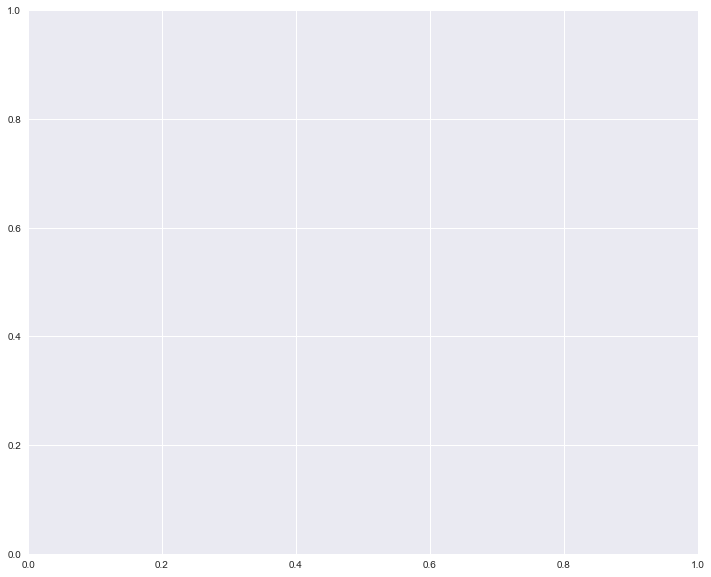

In [125]:
plt.plot(val_y, train_y, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 10, 500,endpoint=True)
y = x
plt.xlabel("Average Rating")
plt.ylabel("Predicted Average Rating")
plt.title("Average Rating vs Predicted Average Rating")
plt.plot(x, y)
plt.show()

In [126]:
df=pd.DataFrame({'Actual':val_y, 'Predicted':val_predictions})  
df.head()

,Actual,Predicted
tconst,,
tt0970866,5.5,7.0
tt0459863,4.0,4.8
tt0099511,6.4,6.8
tt1715741,5.2,5.2
tt4636068,6.4,7.3


ValueError: '.' is not a valid plot kind

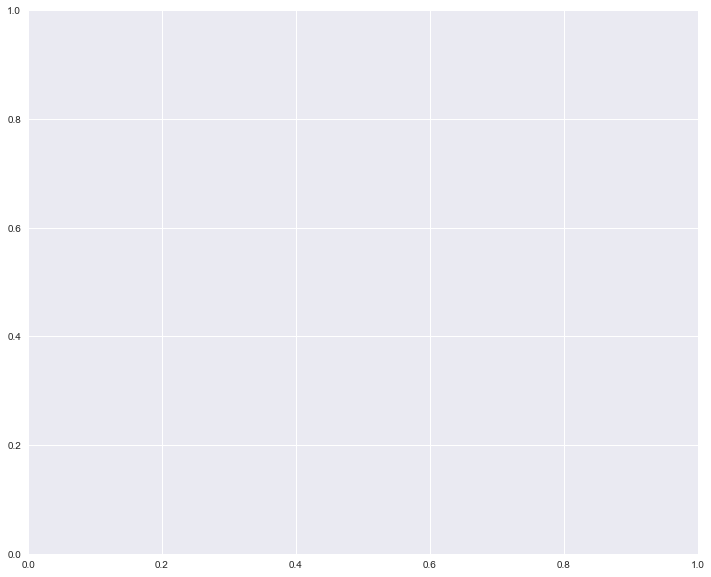

In [127]:
fig, ax = plt.subplots(figsize=(12,10))
df.plot('Actual', 'Predicted', '.')
ax.plot('Actual', 'Predicted', 'r')




#### titlePrincipal Random Forest Model

In [128]:
# define the model
principal_forest_model = RandomForestRegressor(random_state=1)

# fit the model
principal_forest_model.fit(train_X, train_y)

# get predicted ratings on validation data
principalRating_predictions = principal_forest_model.predict(val_X)

print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(val_y, principalRating_predictions))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(val_y, principalRating_predictions))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(val_y, principalRating_predictions)))
print('Variance Score: %.3f' % principal_forest_model.score(X, y, sample_weight=None))

Mean Absolute Error: 0.497
Mean Squared Error: 0.475
Root Mean Squared Error: 0.689
Variance Score: 0.855


In [129]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

NameError: name 'errors' is not defined

In [130]:
df2=pd.DataFrame({'Actual':val_y, 'Predicted':principalRating_predictions})  
df2.head()

,Actual,Predicted
tconst,,
tt0970866,5.5,6.30
tt0459863,4.0,3.94
tt0099511,6.4,6.79
tt1715741,5.2,5.20
tt4636068,6.4,6.96


#### titlePrincipal Random Forest Model with 2018 Validation Data

In [152]:
train_movie_data = principal_rollup.loc[principal_rollup['startYear'] < 2018]
# drop the target column from the training data
train_movie_data = train_movie_data.drop(['averageRating'], axis=1)

# create the test data with 2018 only
test_movie_data = principal_rollup.loc[principal_rollup['startYear'] >= 2018]

# create X and Y dataframes
test_movie_data_X = test_movie_data.drop(['startYear', 'averageRating'], axis=1)
test_movie_data_y = test_movie_data.drop(['startYear', 'myActor_averageRating', 'myProducer_averageRating',
                                          'myWriter_averageRating', 'myDirector_averageRating'], axis=1)

In [159]:
# get predicted ratings on validation data
principalRating_predictions_2018 = principal_forest_model.predict(test_movie_data_X)

In [172]:
# https://datascience.stackexchange.com/questions/18904/how-do-i-convert-a-pandas-dataframe-to-a-1d-array
df3=pd.DataFrame({'Actual':test_movie_data_y.values.ravel(), 'Predicted':principalRating_predictions_2018})  
df3.head(10)

,Actual,Predicted
0,4.9,5.77
1,6.9,6.81
2,5.4,5.38
3,6.4,6.46
4,7.0,6.84
5,5.2,5.35
6,6.5,6.92
7,6.4,6.57
8,6.6,6.60
9,6.6,6.85


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
rating_predict = (df3.groupby(["day", "sex"])
                   .total_bill
                   .mean()
                   .apply(lambda x: x * .2)
                   .reset_index(name="tip"))
tip_all = pd.concat(dict(data=df3[["day", "sex", "tip"]], model=rating_predict),
                    names=["kind"]).reset_index()

sns.factorplot("day", "tip", "kind", data=tip_all, col="sex",
               kind="point", linestyles=["-", "--"], markers=["o", "D"])

<hr>

## Visualize the Results

Potential resource for ploting results: [Python Plotting With Matplotlib (Guide)](https://realpython.com/python-matplotlib-guide/)